<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/ANN_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Dataset from Kaggle

For this lecture, 6000 images since using CPU

ANN Architecture for this would be

784 input

hiddlen layer 1: 128 neurons (relu)

hiddlen layer 2: 64 neurons (relu)

output layer: 10 neurons (softmax - multiclass classification) - 10 diff classes


# Workflow

Dataloader Objects -> Training loop -> Evaluation

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Set random seeds for reproducability
torch.manual_seed(42)

In [7]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


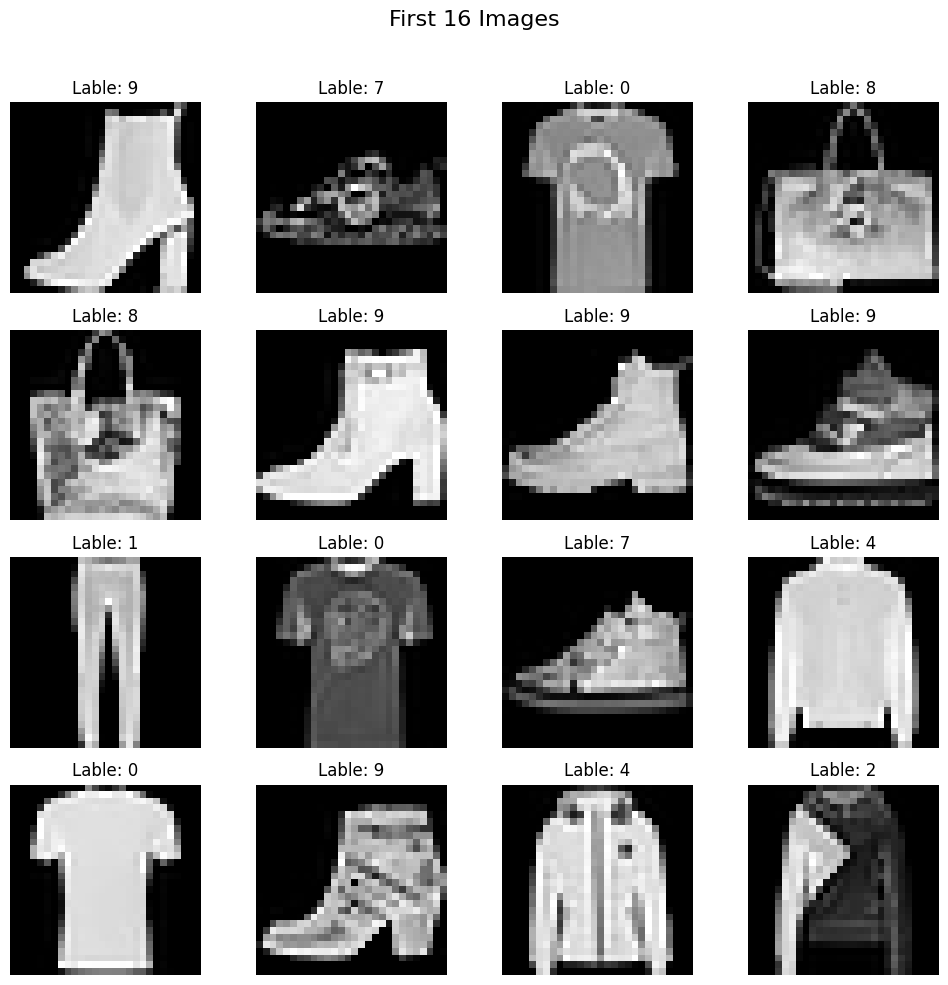

In [15]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flatten()):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img, cmap='gray') # Display in grayscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Lable: {df.iloc[i,0]}") # Show the lable

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust the layout to fit the title
plt.show()

In [18]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# scaling the features ( to make values between 0 and 1 because max pixel is 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00024606, 0.        ,
        0.        ]])

In [23]:
# create a CustomDataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [24]:
# create a train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [26]:
len(train_dataset)

4800

In [27]:
train_dataset[0] # First image an its label

(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [28]:
# create a test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [29]:
# create a train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False) # Because we dont want to shuffle while predicting

784 input (num_features)

hiddlen layer 1: 128 neurons (relu)

hiddlen layer 2: 64 neurons (relu)

output layer: 10 neurons (softmax - multiclass classification) - 10 diff classes

In [30]:
# defining the NN class

class MyNN(nn.Module):
  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):
    return self.model(x)

In [31]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [32]:
# instantiate the model
model = MyNN(X_train.shape[1])

# loss function
criterian = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [36]:
len(train_loader)

150

In [44]:
#training loop
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterian(outputs, batch_labels)

    # clear gradients
    optimizer.zero_grad()

    # back pass
    loss.backward()

    # update grad
    optimizer.step()

    total_epoch_loss += loss.item()

  print(f"Epoch: {epoch+1}, Loss: {total_epoch_loss/len(train_loader)}") # Average loss # Epoch+1 beacuse epoch starts with 0


Epoch: 1, Loss: 1.0737388960520426
Epoch: 2, Loss: 1.057025271654129
Epoch: 3, Loss: 1.0985916225115457
Epoch: 4, Loss: 1.0687289643287659
Epoch: 5, Loss: 1.0531352897485098
Epoch: 6, Loss: 1.0910432612895966
Epoch: 7, Loss: 1.1049454597632091
Epoch: 8, Loss: 1.0850014579296112
Epoch: 9, Loss: 1.0168117793401081
Epoch: 10, Loss: 1.0509639171759289
Epoch: 11, Loss: 1.0704820998509725
Epoch: 12, Loss: 1.0667980126539867
Epoch: 13, Loss: 1.0480788044134777
Epoch: 14, Loss: 1.0723081930478413
Epoch: 15, Loss: 1.0619114383061727
Epoch: 16, Loss: 1.031439207792282
Epoch: 17, Loss: 1.0757732991377513
Epoch: 18, Loss: 1.0855280021826426
Epoch: 19, Loss: 0.9852994426091513
Epoch: 20, Loss: 1.0635617907842
Epoch: 21, Loss: 1.0436557312806447
Epoch: 22, Loss: 1.0272887380917868
Epoch: 23, Loss: 1.027025428613027
Epoch: 24, Loss: 0.9912352736790975
Epoch: 25, Loss: 1.0410155614217123
Epoch: 26, Loss: 1.0352936299641926
Epoch: 27, Loss: 1.0092623440424602
Epoch: 28, Loss: 1.0327011406421662
Epoch: 

In [45]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [46]:
len(test_loader)

38

In [47]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.size(0)
    correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy: {correct/total}")

Accuracy: 0.6891666666666667
